O dataset utilizado está disponível em: [https://www.kaggle.com/datasets/nikhil1e9/loan-default/]

In [184]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp

warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv("../Pitch/archive/Loan_default.csv")

In [186]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

**Descrição das colunas**
</br>LoanID: identificação do devedor, 
</br>Age: Idade, 
</br>Income: Renda anual, 
</br>LoanAmount: valor da dívida, 
</br>CreditScore: Escore de crédito da dívida,
</br>MonthsEmployed: Meses empregado, 
</br>NumCreditLines: Número de linhas de crédito abertas, 
</br>InterestRate: taxa de juros dívida, 
</br>LoanTerm: Prazo para pagar a dívida em meses,
</br>DTIRatio: dívida em relação ao rendimento,
</br>Education: formação / nível máximo de educação,
</br>EmploymentType: ocupação,
</br>MaritalStatus: estado cívil,
</br>HasMortgage: tem hipoteca (garantia?),
</br>HasDependents: Tem dependentes,
</br>LoanPurpose: propósito / motivo da dívida,
</br>HasCoSigner: tem fiador,
</br>Default: variável resposta - 1 se mau, 0 se bom

In [187]:
print(f"Qtd. de linhas {df.shape[0]} / Qtd. de colunas {df.shape[1]}")

Qtd. de linhas 255347 / Qtd. de colunas 18


#### Balanceamento do dataset
Aproximadamente 1:9, não é um desbalanceamento tão grande. Avaliar

<AxesSubplot:>

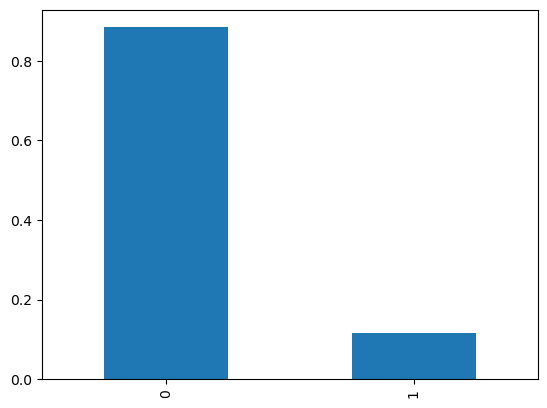

In [6]:
df['Default'].value_counts(normalize=True).plot(kind="bar")

In [6]:
# Percentual de clientes maus na base
df[df['Default'] == 1]['Default'].count() / df.shape[0]#

0.11612824901017048

In [7]:
df.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


#### Missing values

In [8]:
df.isna().sum() # Não tem missing na base de dados

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

#### Outliers

In [32]:
# A metodologia que vou usar para modelar é sensível a outlier?
# Se for uma regressão logística, preciso tratar
# Técnicas sensíveis a escala

In [31]:
# Preciso encontrar uma técnica para tirar os outliers, se houver

##### Idade

In [13]:
print(f"Idade máxima: {df['Age'].max()}")
print(f"Idade mínima: {df['Age'].min()}")

Idade máxima: 69
Idade mínima: 18


{'whiskers': [<matplotlib.lines.Line2D at 0x239ac44c9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x239ac46e730>,
 'boxes': [<matplotlib.lines.Line2D at 0x239ac459d60>],
 'medians': [<matplotlib.lines.Line2D at 0x239ac46ee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x239ac47a220>],
 'means': []}

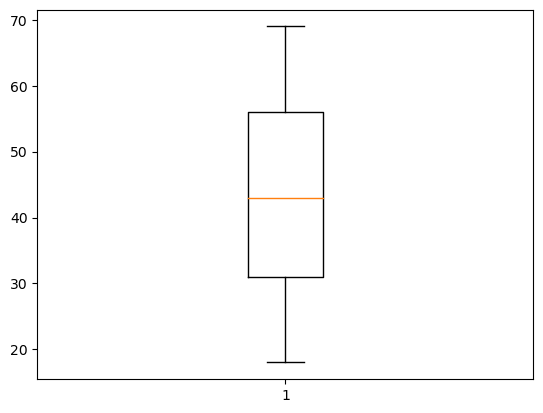

In [11]:
plt.boxplot(df['Age'])

Aparentemente a distribuição da idade na base é simétrica, vamos "verificar"

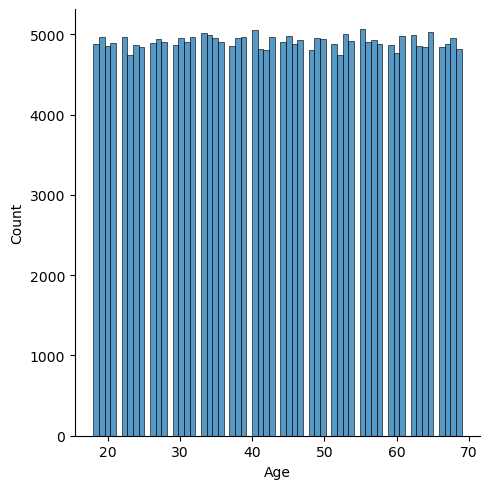

In [19]:
sns.displot(df['Age'])

Na verdade, aparenteme a variável idade está quase "igualmente distribuida" nas faixas

##### Renda

In [23]:
(df['Income'].max() + df['Income'].min()) / 2

82499.5

In [22]:
print(f"Idade máxima: {df['Income'].max()}")
print(f"Idade mínima: {df['Income'].min()}")
print(f"Idade média: {df['Income'].mean()}")

Idade máxima: 149999
Idade mínima: 15000
Idade média: 82499.30459727351


{'whiskers': [<matplotlib.lines.Line2D at 0x239ac4cdeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x239ac4db610>,
 'boxes': [<matplotlib.lines.Line2D at 0x239ac4cdb20>],
 'medians': [<matplotlib.lines.Line2D at 0x239ac4dbd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x239ac4e5100>],
 'means': []}

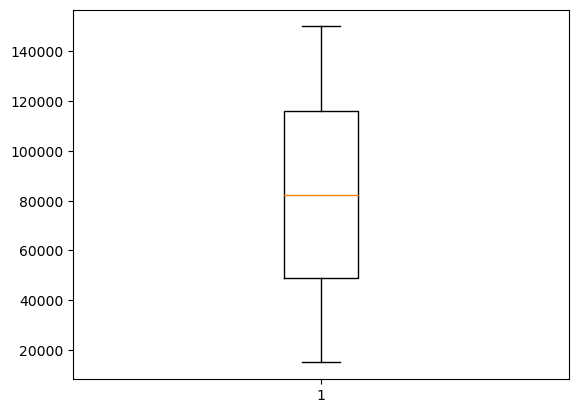

In [15]:
plt.boxplot(df["Income"])

Aparentemente, da mesma forma que a idade, a renda parece estar "igualmente distribuída"

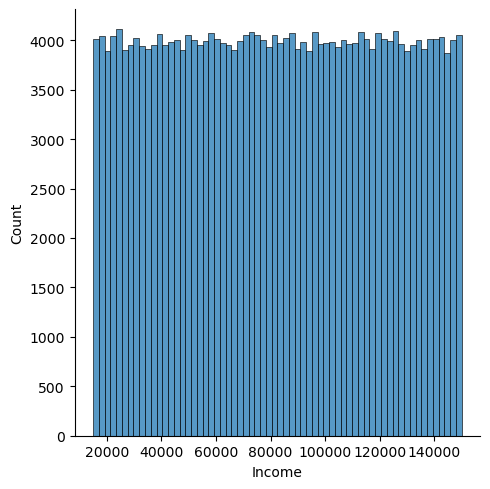

In [24]:
sns.displot(df['Income'])

##### LoanAmount (valor da dívida)

{'whiskers': [<matplotlib.lines.Line2D at 0x239ad1a5730>,
 'caps': [<matplotlib.lines.Line2D at 0x239ad1a5e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x239ad1a53a0>],
 'medians': [<matplotlib.lines.Line2D at 0x239ad1b25b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239ad1b2940>],
 'means': []}

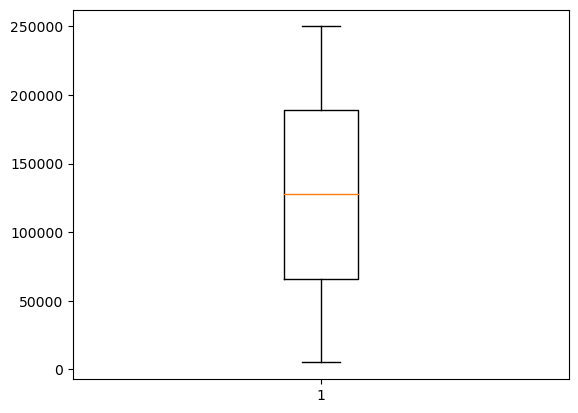

In [25]:
plt.boxplot(df['LoanAmount'])

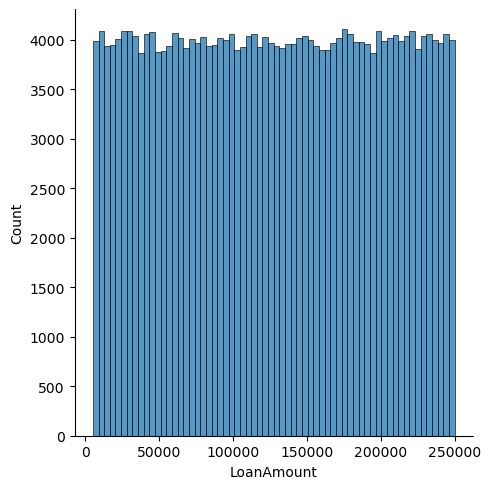

In [26]:
sns.displot(df['LoanAmount'])

##### NumCreditLines

{'whiskers': [<matplotlib.lines.Line2D at 0x239ae04aeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x239ae058610>,
 'boxes': [<matplotlib.lines.Line2D at 0x239ae04ab20>],
 'medians': [<matplotlib.lines.Line2D at 0x239ae058d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x239ae062100>],
 'means': []}

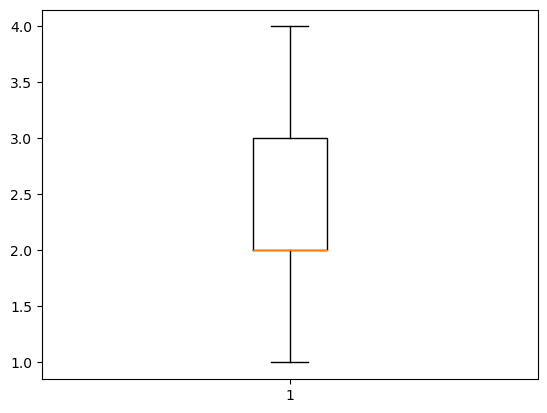

In [27]:
plt.boxplot(df['NumCreditLines'])

In [29]:
df['NumCreditLines'].mean()

2.501035845339871

In [30]:
df['NumCreditLines'].max()

4

In [31]:
df['NumCreditLines'].min()

1

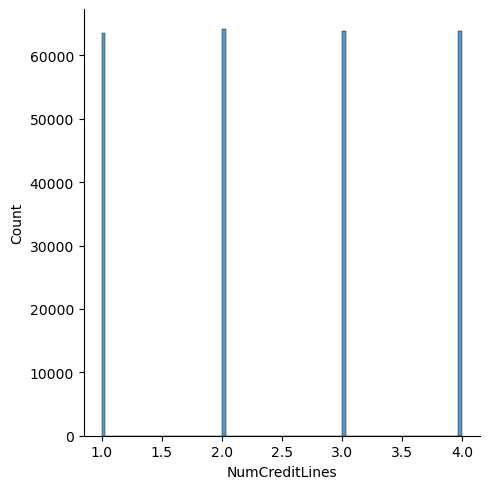

In [28]:
sns.displot(df['NumCreditLines'])

##### MonthsEmployed

{'whiskers': [<matplotlib.lines.Line2D at 0x239ae5b9340>,
 'caps': [<matplotlib.lines.Line2D at 0x239ae5b9a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x239ae5acf70>],
 'medians': [<matplotlib.lines.Line2D at 0x239ae5c31c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239ae5c3550>],
 'means': []}

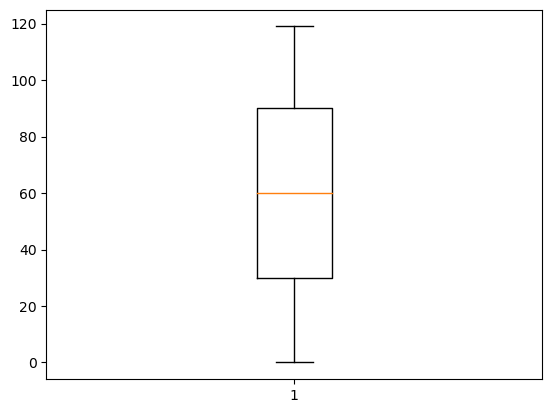

In [32]:
plt.boxplot(df['MonthsEmployed'])

##### Geral

<AxesSubplot:>

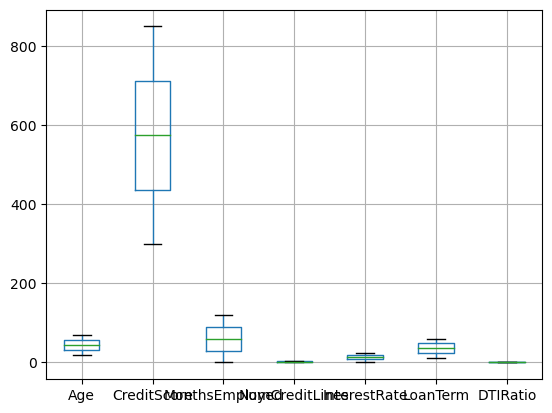

In [9]:
df.drop(['Income', 'LoanAmount', 'Default'], axis=1).boxplot()

<AxesSubplot:>

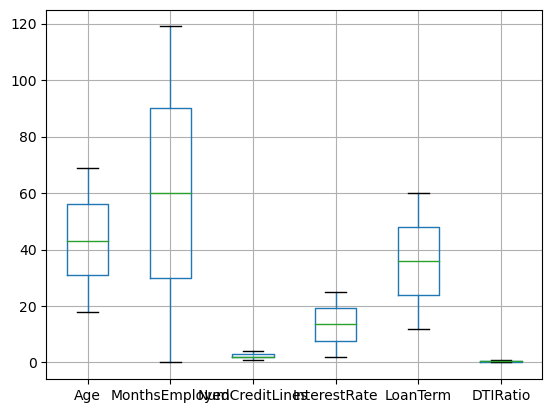

In [10]:
df.drop(['Income', 'LoanAmount', 'CreditScore', 'Default'], axis=1).boxplot()

<AxesSubplot:>

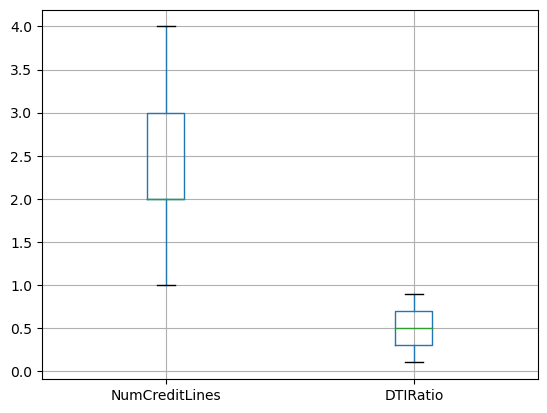

In [11]:
df.drop(['Income', 'LoanAmount', 'CreditScore', 'Age', 'MonthsEmployed', 'LoanTerm', 'InterestRate', 'Default'], axis=1).boxplot()

Conclusão: 
    </br>Não há necessidade de tratamento de outliers, pois todas as variáveis numéricas são simétricas (e "igualmente distribuídas")

#### Categorização (discretização) de variáveis texto

In [188]:
df.select_dtypes('object')

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,Bachelor's,Full-time,Married,No,No,Other,No
255343,98R4KDHNND,High School,Part-time,Divorced,No,No,Home,No
255344,XQK1UUUNGP,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,JAO28CPL4H,High School,Part-time,Single,Yes,Yes,Other,No


In [189]:
df['Education'].value_counts(normalize=True)

Bachelor's     0.252073
High School    0.250259
Master's       0.248842
PhD            0.248826
Name: Education, dtype: float64

In [190]:
df['MaritalStatus'].value_counts(normalize=True)

Married     0.334063
Divorced    0.333010
Single      0.332927
Name: MaritalStatus, dtype: float64

In [191]:
le_education = LabelEncoder()
le_marital_sts = LabelEncoder()
le_employment_type = LabelEncoder()
le_loan_purpose = LabelEncoder()

In [192]:
df['Education'] = le_education.fit_transform(df['Education'])
df['MaritalStatus'] = le_marital_sts.fit_transform(df['MaritalStatus'])
df['EmploymentType'] = le_employment_type.fit_transform(df['EmploymentType'])
df['LoanPurpose'] = le_loan_purpose.fit_transform(df['LoanPurpose'])

In [193]:
df['Education'].value_counts(normalize=True)

0    0.252073
1    0.250259
2    0.248842
3    0.248826
Name: Education, dtype: float64

In [194]:
df['MaritalStatus'].value_counts(normalize=True)

1    0.334063
0    0.333010
2    0.332927
Name: MaritalStatus, dtype: float64

In [195]:
np.unique(df['HasMortgage'])

array(['No', 'Yes'], dtype=object)

In [196]:
encod_binary = {'No': 0, 'Yes': 1}

In [197]:
df['HasMortgage'] = df['HasMortgage'].map(encod_binary)
df['HasDependents'] = df['HasDependents'].map(encod_binary)
df['HasCoSigner'] = df['HasCoSigner'].map(encod_binary)

In [198]:
df.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0


#### Split em treino e teste

In [200]:
X = df.iloc[:, 1:17]
y = df['Default']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((204277, 16), (51070, 16), (204277,), (51070,))

#### Fazendo scaling na base

In [26]:
# Em toda a base
sc1 = StandardScaler()
X_sc = sc1.fit_transform(X)

In [27]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Validação cruzada para escolher melhor algoritmo

In [29]:
# Árvore de decisão
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [30]:
cv = cross_val_score(dt, X, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.7202703124184172


In [37]:
# Random Forest
rf = RandomForestClassifier(n_estimators=80, max_depth=6, n_jobs=-1)

In [38]:
cv = cross_val_score(rf, X, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.7379892660634843


In [72]:
xgb = XGBClassifier(max_depth=6, n_estimators=100, learning_rate=0.1)

In [73]:
cv = cross_val_score(xgb, X, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.7520161701220559


In [28]:
reg = LogisticRegression()

In [29]:
cv = cross_val_score(reg, X_sc, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.7452030124669863


Tentei testar o SVM, mas demorou muito para rodar... provavelmente devido à quantidade de variáveis

In [82]:
# SVM - Sensível à escala
svm = SVC()

In [ ]:
cv = cross_val_score(svm, X_sc, y, cv=5, scoring='roc_auc').mean()
print(cv)

In [33]:
# Multilayer perceptron
net = MLPClassifier(hidden_layer_sizes=(16,16))

In [34]:
cv = cross_val_score(net, X, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.735544324327425


In [203]:
# LightGBM
lgb = LGBMClassifier(max_depth=6, n_estimators=70, num_leaves=25, learning_rate=0.10)

In [214]:
cv = cross_val_score(lgb, X, y, cv=5, scoring='roc_auc')
print(cv.mean())

0.752183888137924


In [215]:
cv

array([0.75408712, 0.74966002, 0.75369788, 0.75416197, 0.74931245])

O melhor algortimo nos testes na base toda é o LightGBM

#### Eliminação Recursiva de variáveis

In [70]:
# LightGBM
lgb = LGBMClassifier(max_depth=6, n_estimators=70, num_leaves=25, learning_rate=0.10)

In [71]:
selector = RFECV(lgb, step=1, cv=5)
selector = selector.fit(X, y)

In [72]:
dir(selector)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'estimator',
 'estimator_',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'get_support

In [73]:
selector.n_features_

13

In [75]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True])

In [79]:
selector.get_feature_names_out()

array(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasDependents', 'HasCoSigner'],
      dtype=object)

In [77]:
X.loc[:, selector.support_]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasDependents,HasCoSigner
0,56,85994,50587,520,80,4,15.23,0.44,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,0.68,2,0,1,0,1
2,46,84208,129188,451,26,3,21.17,0.31,2,3,0,1,0
3,32,31713,44799,743,0,3,7.07,0.23,1,0,1,0,0
4,60,20437,9139,633,8,4,6.51,0.73,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,0.85,0,0,1,0,0
255343,32,51953,189899,511,14,2,11.55,0.21,1,1,0,0,0
255344,56,84820,208294,597,70,3,5.29,0.50,1,2,1,1,1
255345,42,85109,60575,809,40,1,20.90,0.44,1,1,2,1,0


In [80]:
excluidas = []
for a in X.columns:
    if a not in selector.get_feature_names_out():
        excluidas.append(a)

In [81]:
excluidas

['LoanTerm', 'HasMortgage', 'LoanPurpose']

In [82]:
X_selec = X.loc[:, selector.support_]

In [84]:
lgb = LGBMClassifier(max_depth=6, n_estimators=70, num_leaves=25, learning_rate=0.10)
cv = cross_val_score(lgb, X_selec, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.7524559943683815


#### Feature engineering

Testar se a criação de uma nova variável aumenta a performance do modelo

Variável proposta: "Comprometimento de renda" - LoanAmount / Income

Quanto a dívida representa da renda anual

In [85]:
X_selec['CompRenda'] = X_selec['LoanAmount'] / X_selec['Income']

In [86]:
X_selec

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasDependents,HasCoSigner,CompRenda
0,56,85994,50587,520,80,4,15.23,0.44,0,0,0,1,1,0.588262
1,69,50432,124440,458,15,1,4.81,0.68,2,0,1,0,1,2.467481
2,46,84208,129188,451,26,3,21.17,0.31,2,3,0,1,0,1.534154
3,32,31713,44799,743,0,3,7.07,0.23,1,0,1,0,0,1.412638
4,60,20437,9139,633,8,4,6.51,0.73,0,3,0,1,0,0.447179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,0.85,0,0,1,0,0,5.547329
255343,32,51953,189899,511,14,2,11.55,0.21,1,1,0,0,0,3.655208
255344,56,84820,208294,597,70,3,5.29,0.50,1,2,1,1,1,2.455718
255345,42,85109,60575,809,40,1,20.90,0.44,1,1,2,1,0,0.711734


In [87]:
lgb = LGBMClassifier(max_depth=6, n_estimators=70, num_leaves=25, learning_rate=0.10)
cv = cross_val_score(lgb, X_selec, y, cv=5, scoring='roc_auc').mean()
print(cv)

0.7524457455586233


A variável criada não melhorou o modelo

In [89]:
X_selec.drop(['CompRenda'], axis=1, inplace=True)

In [90]:
X_selec.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasDependents,HasCoSigner
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,-0.004689,-0.000882,0.000787,-0.002187,0.000710,-0.002918
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,0.000205,-0.000965,-0.005146,0.000637,-0.001570,-0.003524
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.001122,0.002551,0.003060,-0.000771,0.000139,-0.001848
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,-0.001039,0.000214,0.003503,-0.003218,-0.003018,-0.002755
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,0.001765,-0.001304,0.000564,-0.000095,0.001450,0.001045
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000586,0.002691,0.000219,-0.000664,-0.001895,0.002105
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000575,0.002879,0.000525,-0.005079,-0.000243,-0.003991
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,1.000000,0.001789,-0.000578,0.004492,0.001492,0.000373
Education,-0.000882,-0.000965,0.002551,0.000214,-0.001304,0.002691,0.002879,0.001789,1.000000,0.000236,-0.004717,0.001048,0.001707
EmploymentType,0.000787,-0.005146,0.003060,0.003503,0.000564,0.000219,0.000525,-0.000578,0.000236,1.000000,0.002768,0.002480,-0.000033


#### Modelo Final

A partir dos passos anteriores, chegamos ao modelo final:

Melhor algoritmo: LightGBM
</br>Quantidade de variáveis: 13

In [213]:
df.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0


In [205]:
X = df.loc[:, selector.get_feature_names_out()]
y = df['Default']

In [206]:
# Split em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [207]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((204277, 13), (51070, 13), (204277,), (51070,))

In [216]:
# Treinando o modelo
lgb = LGBMClassifier(max_depth=6, n_estimators=70, num_leaves=25, learning_rate=0.10)

In [217]:
lgb.fit(X_train, y_train)

LGBMClassifier(max_depth=6, n_estimators=70, num_leaves=25)

In [218]:
y_pred_train = lgb.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    180497
           1       0.65      0.07      0.12     23780

    accuracy                           0.89    204277
   macro avg       0.77      0.53      0.53    204277
weighted avg       0.86      0.89      0.84    204277



In [220]:
print(roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1]))

0.7682546417614242


In [222]:
print(roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1]))

0.7575154248114204


In [221]:
# Avaliando modelo
y_pred_test = lgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45197
           1       0.59      0.06      0.11      5873

    accuracy                           0.89     51070
   macro avg       0.74      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070



In [109]:
# KS 

In [182]:
y_train_proba = lgb.predict_proba(X_train)[:, 1]
print(ks_2samp(y_train_proba[y_train==0], y_train_proba[y_train==1]).statistic)

0.3958476498026315


In [183]:
y_test_proba = lgb.predict_proba(X_test)[:, 1]
print(ks_2samp(y_test_proba[y_test==0], y_test_proba[y_test==1]).statistic)

0.3857667864526674


In [224]:
importance = pd.DataFrame({'variaveis': X.columns, 'importancia': lgb.feature_importances_})

In [227]:
importance.sort_values(by='importancia', ascending=False)

,variaveis,importancia
1,Income,246
2,LoanAmount,241
6,InterestRate,236
4,MonthsEmployed,218
0,Age,197
3,CreditScore,156
7,DTIRatio,93
9,EmploymentType,75
5,NumCreditLines,54
8,Education,53
